# NaN Boxing Benchmarks

In [5]:
# Librairies
%pip install -q matplotlib numpy pandas scikit-learn
import numpy as np
import re
import subprocess
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
INTERPRETER = "./target/release/som-interpreter-bc"
LIBS = "core-lib/Smalltalk core-lib/Examples/Benchmarks core-lib/Examples/Benchmarks/LanguageFeatures core-lib/Examples/Benchmarks/TestSuite core-lib/Examples/Benchmarks/ValBenchmark"

def exec_bench(name, runs=10):
    runtimes = []
    allocations = []

    for i in range(runs):
        cmd = f"{INTERPRETER} -c {LIBS} . -- BenchmarkHarness {name} 1"
        
        result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
        output = result.stdout

        runtime = re.search(r"runtime: (\d+)us", output)
        allocated = re.search(r"Allocated:    (\d+)bytes", output)
        if runtime:
            runtimes.append(int(runtime.group(1)))
        if allocated:
            allocations.append(int(allocated.group(1)))

        else:
            print("Runtime not found in output:")
            print(output)
    
    return (runtimes, allocations)


In [7]:
def plot_results(name, runtimes, allocations):
    import matplotlib.pyplot as plt

    iterations = list(range(1, len(runtimes) + 1))
    avg_runtime = sum(runtimes) / len(runtimes)
    avg_alloc = sum(allocations) / len(allocations)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

    # Runtime plot (top)
    ax1.plot(iterations, runtimes, marker='o', linestyle='-', color='blue', label='Runtime (μs)')
    ax1.axhline(avg_runtime, color='blue', linestyle='--', label=f'Avg Runtime: {avg_runtime:.1f}μs')
    ax1.set_ylabel('Runtime (μs)')
    ax1.set_title(f'Benchmark: {name}')
    ax1.legend()
    ax1.grid(True)

    # Allocation plot (bottom)
    ax2.bar(iterations, allocations, color='orange', alpha=0.6, label='Allocation (bytes)')
    ax2.axhline(avg_alloc, color='orange', linestyle='--', label=f'Avg Alloc: {avg_alloc:.0f} bytes')
    ax2.set_ylabel('Allocation (bytes)')
    ax2.set_xlabel('Iteration')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()


Benchmark: DoubleBench, Runs: 100, Runtimes: [25, 5, 11, 5, 4, 6, 6, 4, 5, 3, 6, 3, 5, 3, 3, 6, 5, 5, 3, 3, 3, 4, 5, 5, 3, 3, 3, 3, 3, 3, 4, 6, 5, 5, 6, 3, 3, 4, 3, 5, 5, 3, 6, 3, 3, 3, 3, 3, 4, 10, 3, 3, 5, 10, 5, 6, 6, 6, 4, 4, 9, 4, 5, 3, 7, 4, 3, 3, 3, 4, 6, 6, 4, 4, 3, 4, 3, 3, 3, 3, 6, 4, 6, 6, 6, 4, 6, 5, 3, 3, 3, 7, 3, 5, 6, 3, 6, 3, 6, 5], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


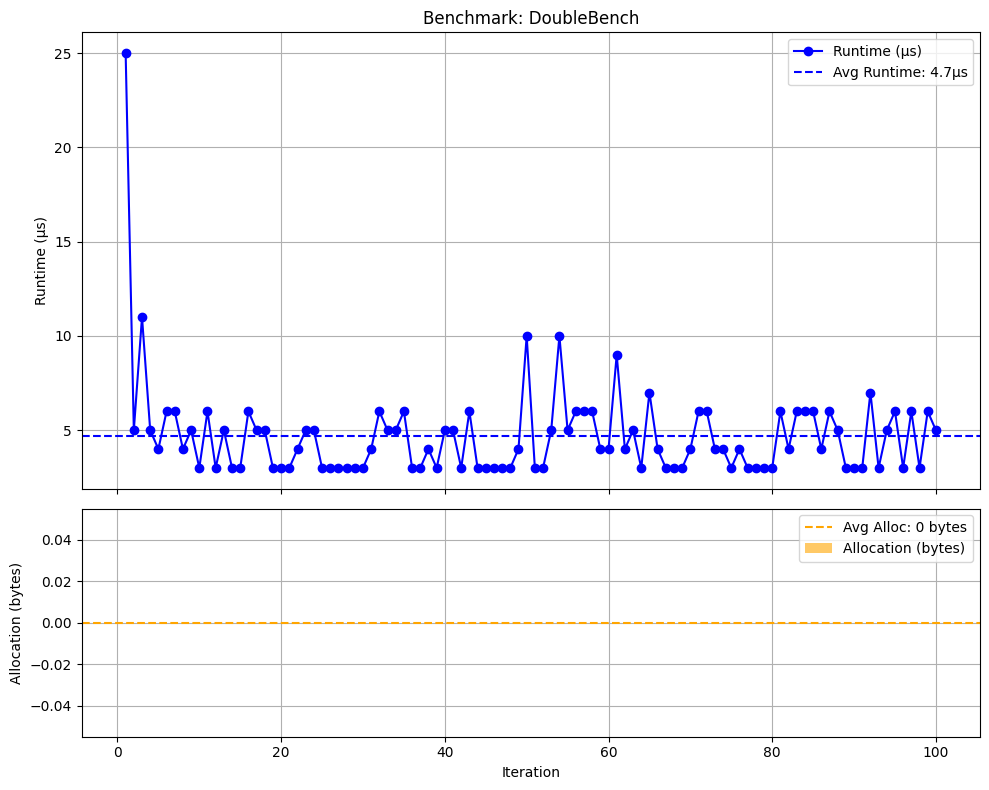

Benchmark: DoubleMedBench, Runs: 100, Runtimes: [9, 9, 10, 7, 6, 7, 7, 7, 10, 7, 10, 6, 9, 9, 8, 9, 7, 7, 10, 8, 7, 7, 6, 6, 7, 10, 9, 7, 10, 7, 7, 9, 9, 7, 7, 9, 7, 8, 7, 7, 9, 6, 10, 18, 7, 10, 6, 9, 7, 10, 6, 6, 7, 7, 7, 11, 8, 7, 15, 7, 21, 9, 11, 7, 7, 7, 6, 6, 10, 6, 10, 7, 9, 6, 10, 7, 15, 7, 10, 8, 8, 7, 7, 7, 7, 7, 8, 10, 8, 7, 7, 10, 6, 6, 7, 10, 10, 8, 11, 9], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


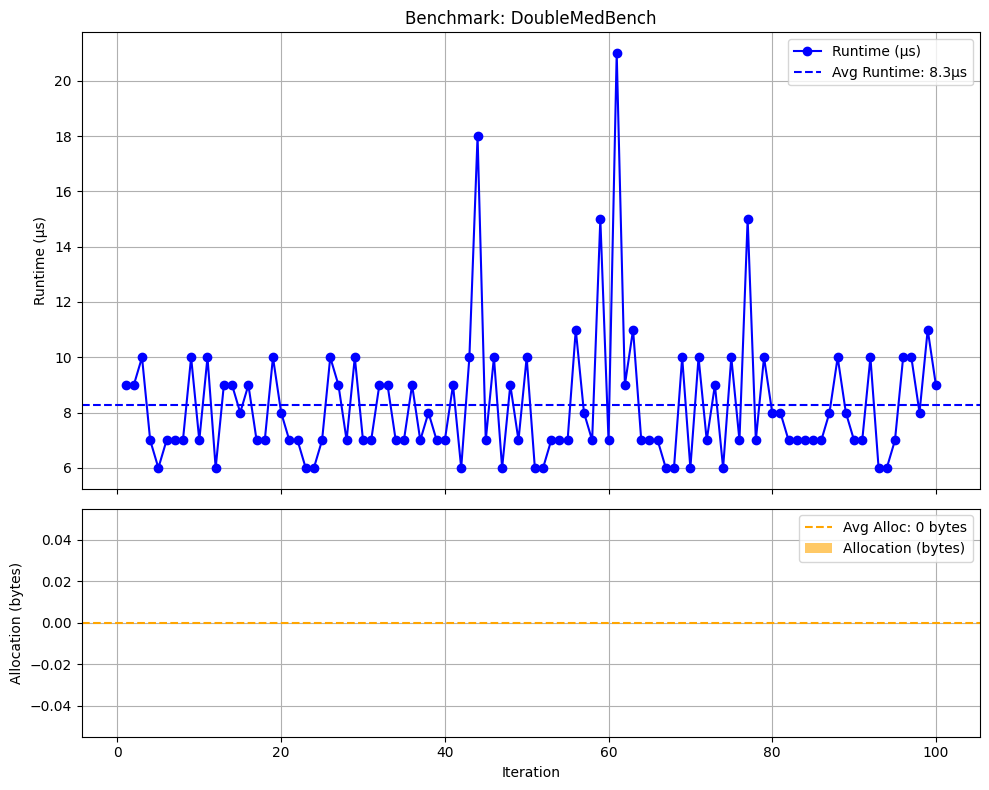

Benchmark: DoubleHighBench, Runs: 100, Runtimes: [10715, 10514, 10455, 10506, 10556, 10573, 10722, 10581, 10771, 10667, 10400, 10409, 10571, 10659, 10766, 10706, 10737, 10652, 10773, 10398, 10307, 10797, 10673, 10750, 10763, 10599, 10477, 10636, 10514, 10341, 10444, 10377, 10386, 10421, 10303, 10340, 10387, 10271, 10414, 10319, 10388, 10192, 10426, 10297, 10344, 10299, 10226, 10319, 10417, 10497, 10202, 10411, 10278, 10327, 10252, 10587, 10484, 10830, 10778, 10560, 10627, 10593, 10681, 10723, 10369, 10470, 10411, 10388, 10474, 10395, 10392, 10341, 13474, 11230, 10436, 10332, 10289, 10525, 10323, 10448, 10444, 10389, 10418, 10272, 10288, 10363, 10358, 10416, 10377, 10358, 10492, 10354, 10381, 10444, 10323, 10320, 10417, 10439, 10398, 10269], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

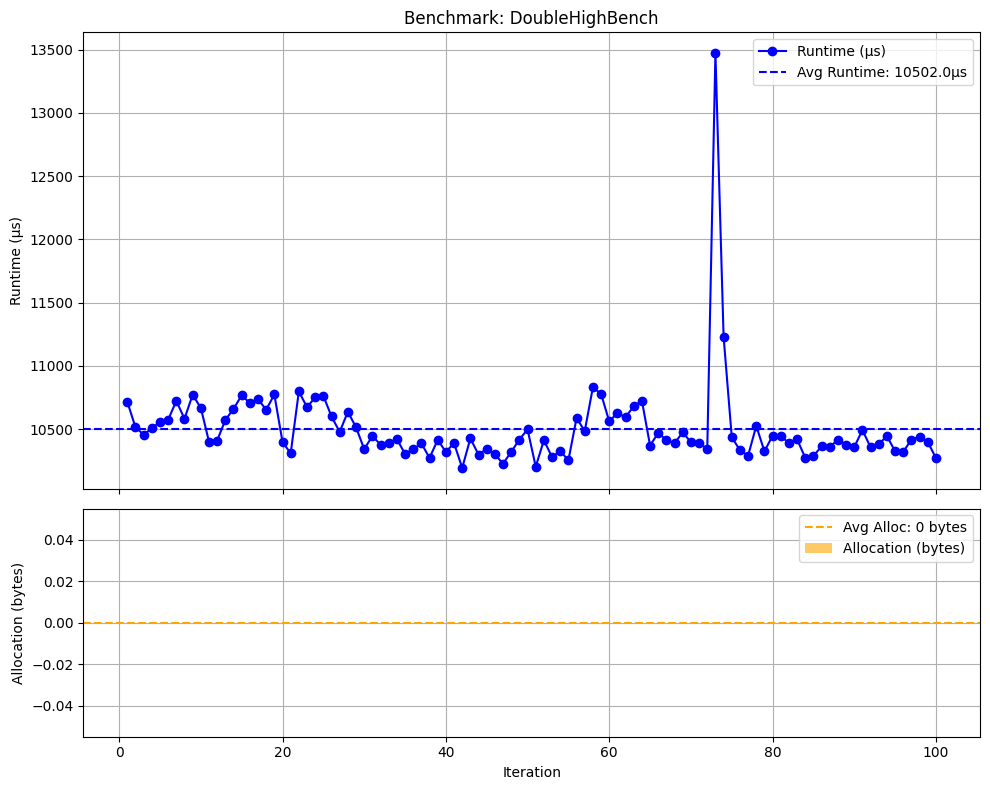

Benchmark: DoubleSqrtBench, Runs: 100, Runtimes: [1518, 1107, 1123, 1123, 1152, 1094, 1132, 1124, 1101, 1138, 1123, 1140, 1119, 1092, 1124, 1251, 1237, 1215, 1159, 1129, 1134, 1114, 1126, 1220, 1155, 1114, 1138, 1128, 1101, 1170, 1103, 1126, 1108, 1125, 1103, 1145, 1117, 1125, 1117, 1155, 1112, 1112, 1117, 1119, 1112, 1134, 1135, 1127, 1135, 1120, 1099, 1133, 1132, 1125, 1133, 1182, 1193, 1133, 1101, 1117, 1107, 1155, 1117, 1122, 1152, 1133, 1107, 1133, 1119, 1110, 1128, 1151, 1099, 1112, 1138, 1111, 1179, 1197, 1091, 1186, 1235, 1160, 1201, 1146, 1103, 1188, 1129, 1108, 1116, 1128, 1123, 1127, 1101, 1111, 1132, 1116, 1159, 1193, 1134, 1148], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


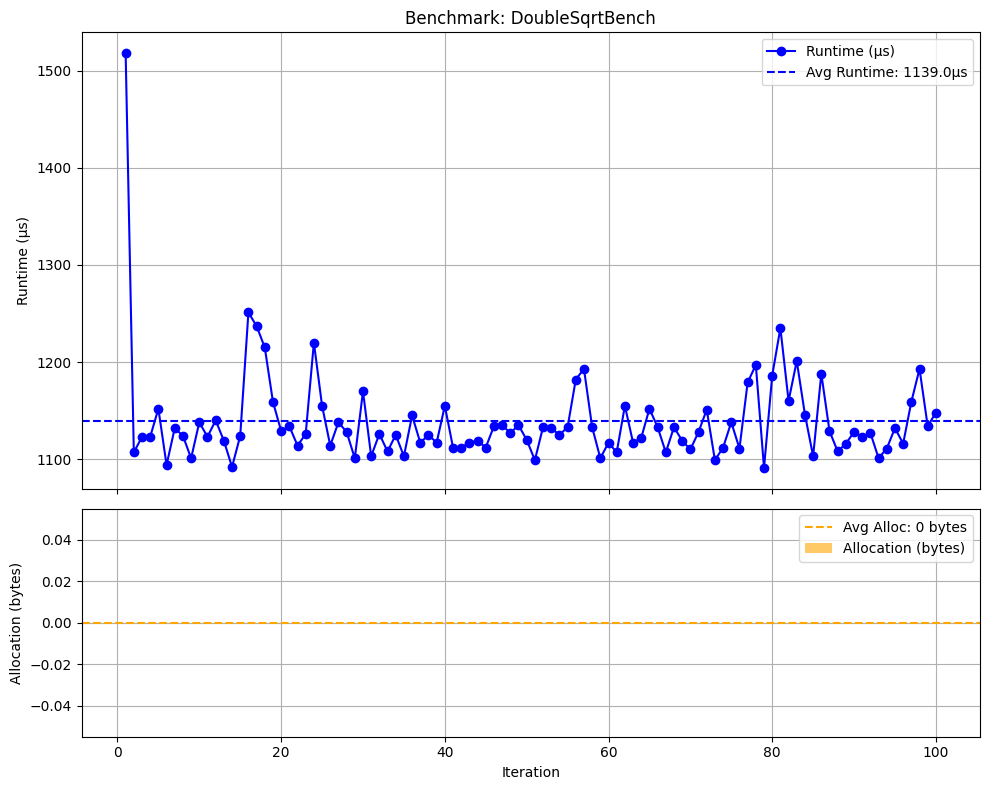

Benchmark: DoubleLExpBench, Runs: 100, Runtimes: [42, 37, 31, 37, 33, 31, 37, 30, 29, 32, 36, 30, 30, 76, 43, 39, 31, 34, 31, 29, 40, 29, 41, 37, 35, 37, 49, 49, 31, 41, 37, 38, 44, 42, 33, 38, 30, 40, 30, 42, 34, 42, 35, 37, 37, 31, 30, 41, 39, 38, 34, 30, 43, 31, 30, 33, 34, 41, 34, 31, 31, 30, 31, 33, 30, 41, 40, 38, 37, 36, 30, 31, 37, 35, 42, 40, 36, 45, 38, 31, 35, 33, 42, 35, 40, 39, 35, 49, 33, 37, 31, 39, 33, 37, 41, 30, 37, 39, 38, 34], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


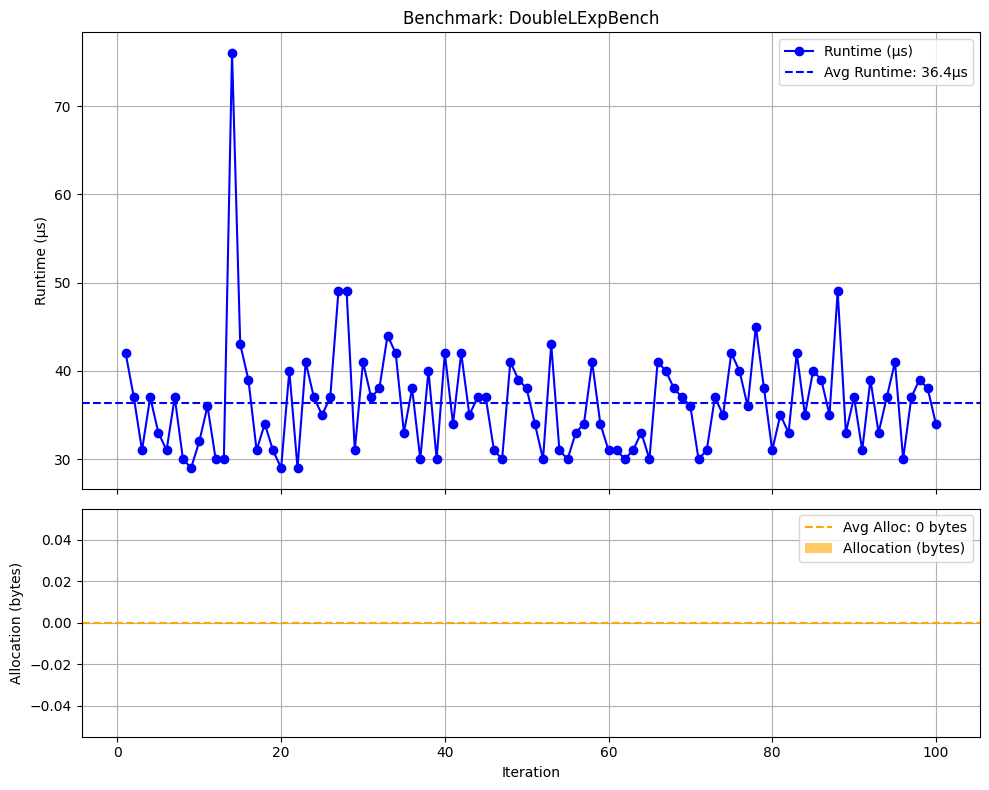

Benchmark: IntegerBench, Runs: 100, Runtimes: [5, 5, 4, 5, 4, 5, 4, 4, 5, 3, 3, 5, 3, 3, 3, 4, 5, 3, 4, 3, 2, 4, 3, 4, 5, 4, 3, 4, 3, 4, 4, 4, 3, 5, 3, 4, 5, 4, 5, 4, 3, 5, 4, 4, 4, 4, 3, 3, 5, 3, 3, 4, 5, 4, 6, 4, 3, 4, 4, 3, 3, 3, 4, 5, 3, 5, 3, 3, 3, 4, 5, 3, 9, 4, 19, 5, 5, 3, 3, 3, 5, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 5, 3, 3, 5, 5, 5, 5], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


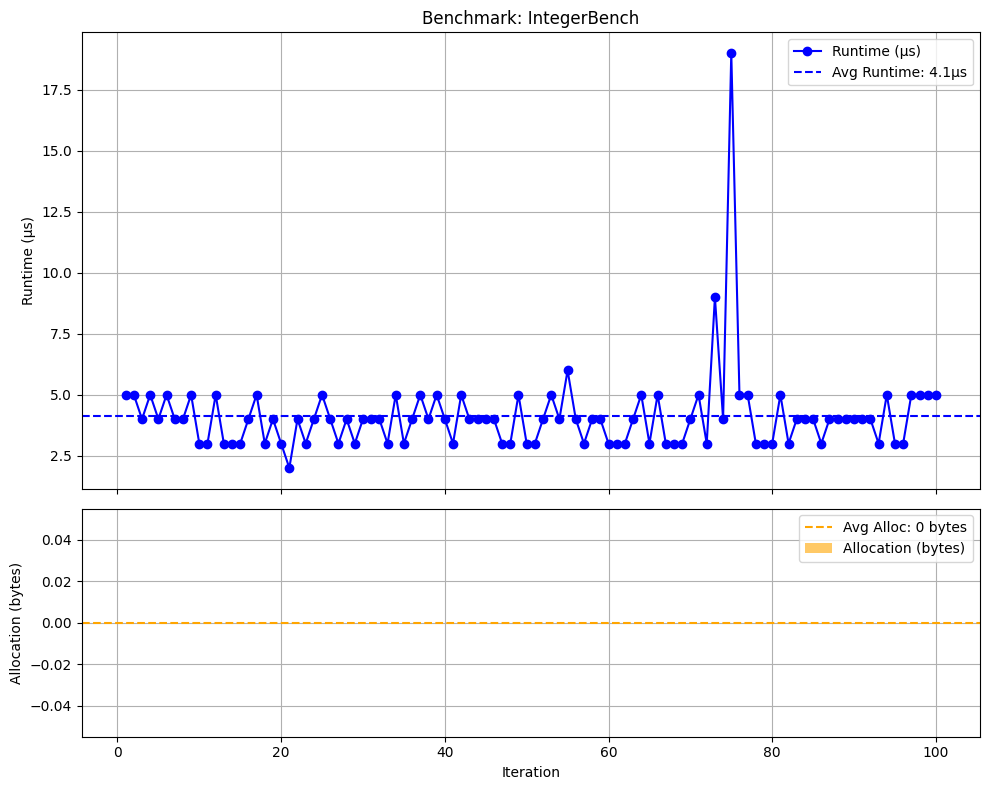

Benchmark: IntegerMedBench, Runs: 100, Runtimes: [24, 11, 11, 11, 14, 11, 14, 16, 11, 12, 14, 17, 12, 11, 16, 12, 11, 14, 14, 14, 12, 11, 11, 16, 12, 11, 12, 18, 12, 11, 12, 13, 19, 14, 11, 12, 13, 11, 11, 11, 11, 14, 15, 14, 12, 12, 12, 12, 11, 14, 14, 12, 12, 13, 22, 21, 13, 12, 16, 11, 11, 11, 11, 17, 16, 12, 17, 13, 15, 12, 12, 12, 11, 14, 12, 12, 15, 12, 16, 15, 12, 19, 12, 13, 11, 11, 13, 11, 16, 16, 13, 12, 15, 12, 11, 11, 11, 20, 11, 16], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


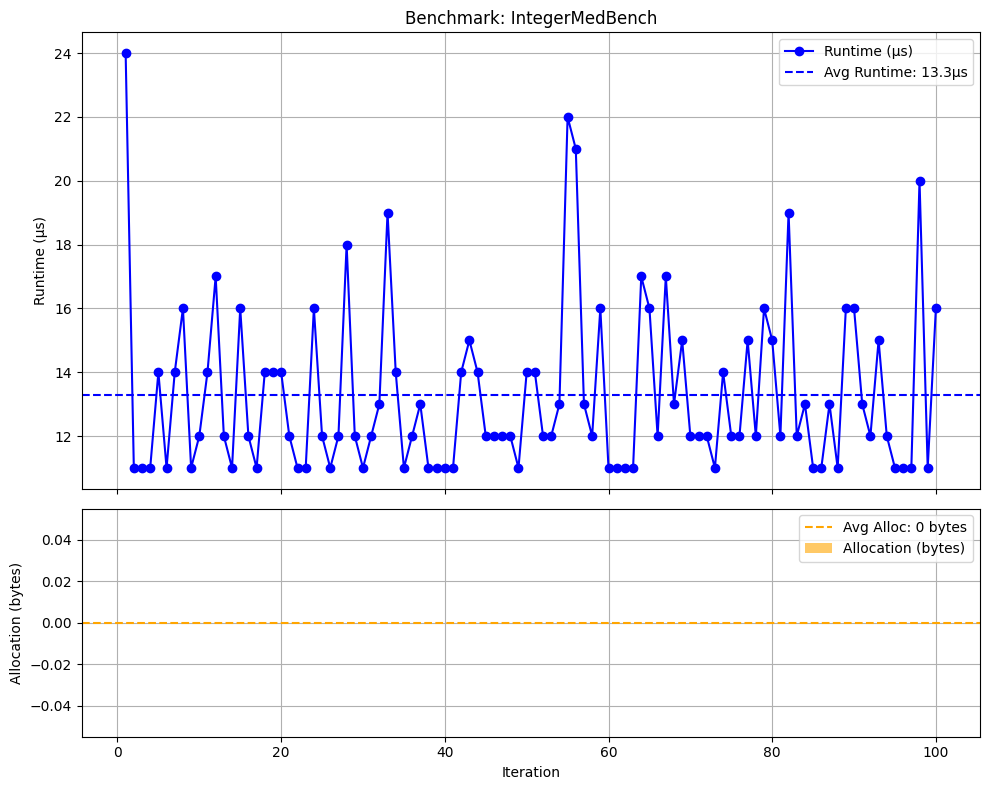

Benchmark: IntegerHighBench, Runs: 100, Runtimes: [72, 70, 76, 66, 74, 74, 65, 68, 64, 67, 63, 67, 66, 65, 66, 66, 65, 68, 77, 82, 70, 64, 66, 66, 65, 65, 106, 72, 73, 67, 67, 65, 93, 73, 65, 64, 64, 74, 66, 66, 87, 64, 66, 79, 79, 67, 65, 73, 64, 64, 82, 72, 67, 67, 64, 68, 80, 65, 68, 66, 80, 76, 74, 67, 65, 66, 64, 70, 73, 67, 69, 65, 66, 65, 65, 66, 69, 77, 71, 65, 85, 66, 64, 69, 77, 64, 73, 65, 65, 65, 66, 72, 66, 65, 64, 66, 66, 87, 65, 73], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


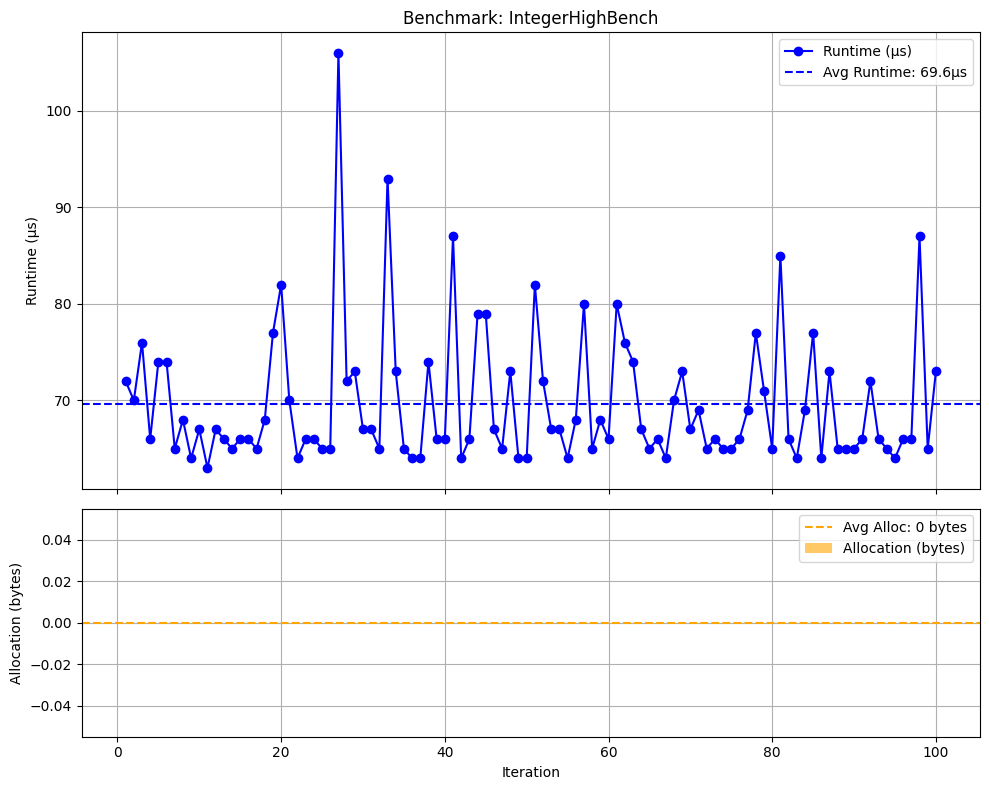

Benchmark: IntegerExpBench, Runs: 100, Runtimes: [77, 57, 61, 51, 50, 49, 55, 57, 58, 52, 51, 47, 48, 57, 51, 63, 51, 55, 47, 49, 53, 55, 51, 58, 52, 51, 48, 61, 48, 47, 50, 47, 52, 48, 64, 51, 57, 53, 60, 64, 47, 54, 53, 48, 48, 51, 51, 55, 55, 51, 48, 53, 47, 108, 52, 62, 54, 55, 56, 56, 48, 55, 53, 50, 57, 46, 53, 56, 47, 48, 54, 50, 51, 50, 47, 53, 49, 48, 54, 52, 52, 47, 51, 54, 48, 53, 59, 49, 54, 54, 47, 47, 55, 47, 55, 46, 52, 47, 54, 47], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


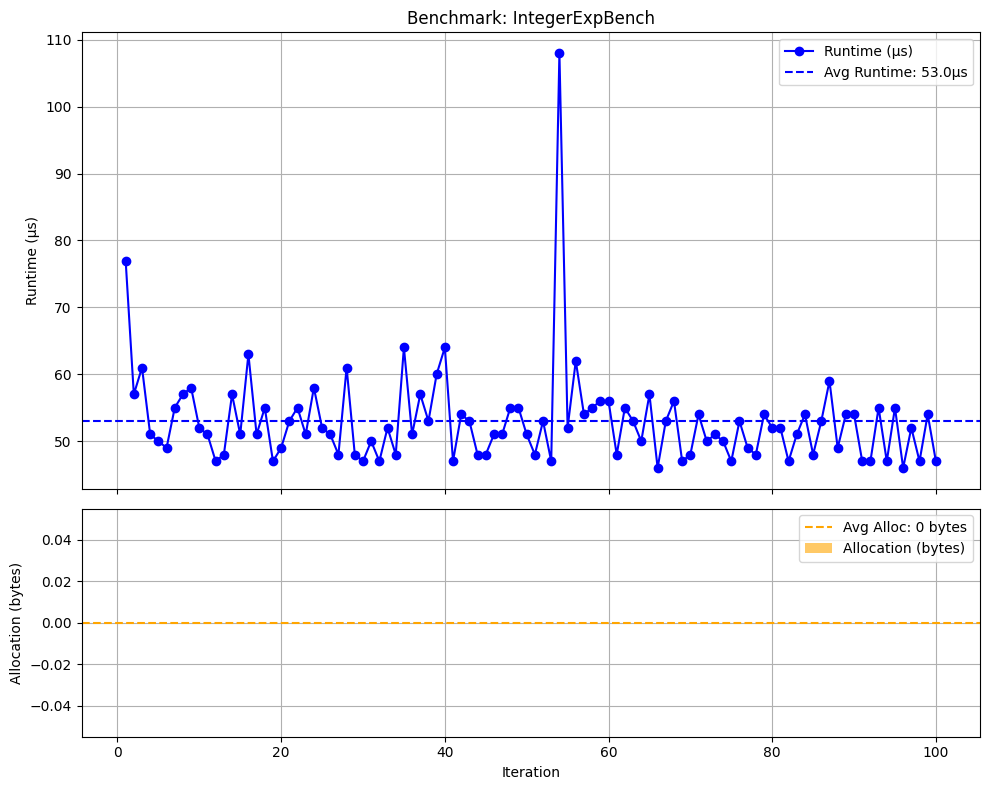

Benchmark: IntegerBigBench, Runs: 100, Runtimes: [650, 534, 546, 574, 524, 535, 540, 573, 526, 565, 560, 548, 557, 552, 566, 533, 560, 576, 548, 568, 566, 518, 648, 516, 525, 578, 527, 544, 533, 559, 549, 538, 570, 563, 553, 581, 539, 540, 521, 541, 543, 551, 555, 569, 535, 529, 582, 547, 532, 583, 558, 540, 543, 549, 531, 529, 582, 716, 543, 582, 584, 549, 530, 554, 593, 510, 529, 539, 556, 548, 551, 585, 548, 1713, 606, 548, 529, 591, 551, 577, 589, 505, 535, 540, 543, 565, 553, 553, 564, 541, 529, 544, 526, 519, 534, 555, 566, 541, 577, 576], Allocations: [331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 33

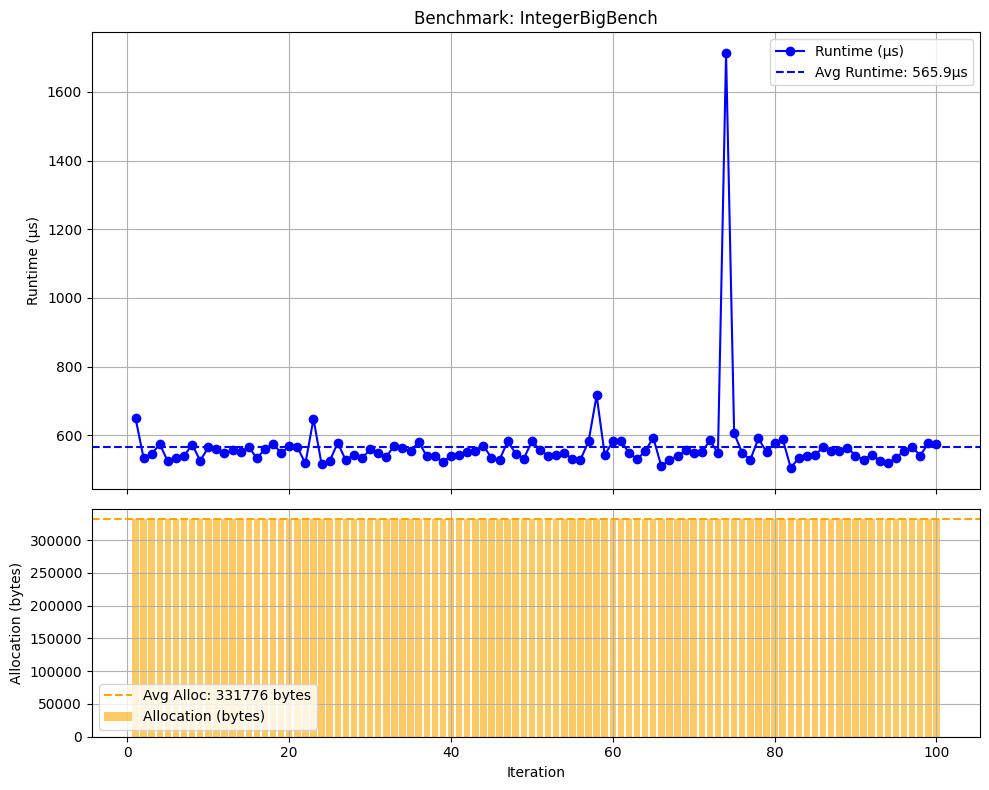

In [8]:
# General Configuration
BENCHMARKS = [
    "DoubleBench",
    "DoubleMedBench",
    "DoubleHighBench",
    "DoubleSqrtBench",
    "DoubleLExpBench",
    "IntegerBench",
    "IntegerMedBench",
    "IntegerHighBench",
    "IntegerExpBench",
    "IntegerBigBench"
]

runs = 100

for benchmark in BENCHMARKS:
    outcome = exec_bench(benchmark, runs)
    print(f"Benchmark: {benchmark}, Runs: {runs}, Runtimes: {outcome[0]}, Allocations: {outcome[1]}")
    plot_results(benchmark, outcome[0], outcome[1])